In [1]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np


In [30]:
def find_emotion_T(name):
        #if('neutral' in name): return 0
        #elif('happiness' in name): return 1
        #elif('sadness' in name): return 2
        #elif('anger' in name): return 3 
        
        if('neutral_F' in name): return 0
        elif('happiness_F' in name): return 1
        elif('sadness_F' in name): return 2
        elif('anger_F' in name): return 3
        elif('neutral_M' in name): return 4
        elif('happiness_M' in name): return 5
        elif('sadness_M' in name): return 6
        elif('anger_M' in name): return 7

      
        else: return "-1"

In [4]:
import time
import os
path = 'C:\\DB\\wav'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        arr = mfccs, find_emotion_T(file)
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 58.21104693412781 seconds ---


In [9]:
X, y = zip(*lst)

In [10]:
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((600, 40), (600,))

In [2]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'C:\\model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

NameError: name 'X' is not defined

In [4]:
import joblib
X = joblib.load('C:\\model\\X.joblib')
y = joblib.load('C:\\model\\Y.joblib')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dtree = DecisionTreeClassifier()

In [7]:

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.48      0.57      0.52        21
           2       0.77      0.77      0.77        22
           3       0.76      0.62      0.68        26
           4       0.79      0.81      0.80        27
           5       0.59      0.61      0.60        28
           6       0.74      0.77      0.75        26
           7       0.71      0.77      0.74        26

    accuracy                           0.71       198
   macro avg       0.72      0.71      0.71       198
weighted avg       0.72      0.71      0.71       198



In [10]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [11]:
x_traincnn.shape, x_testcnn.shape

((402, 40, 1), (198, 40, 1))

In [2]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))


opt = tensorflow.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_8 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 128)          

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=350, validation_data=(x_testcnn, y_test))

Physical devices cannot be modified after being initialized
Epoch 1/350
26/26 [==============================] - 4s 59ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1111
Epoch 2/350
26/26 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.1187 - val_loss: nan - val_accuracy: 0.1111
Epoch 3/350
26/26 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.1246 - val_loss: nan - val_accuracy: 0.1111
Epoch 4/350
26/26 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.1536 - val_loss: nan - val_accuracy: 0.1111
Epoch 5/350
26/26 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.1329 - val_loss: nan - val_accuracy: 0.1111
Epoch 6/350
26/26 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.1407 - val_loss: nan - val_accuracy: 0.1111
Epoch 7/350
26/26 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.1252 - val_loss: nan - val_accur

KeyboardInterrupt: 

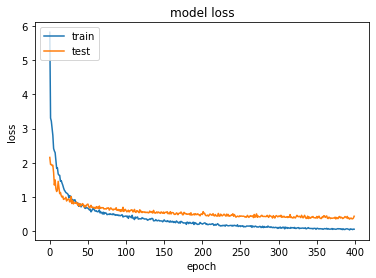

In [16]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

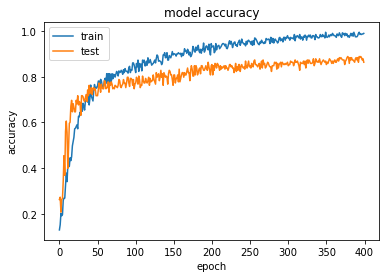

In [17]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
predictions = model.predict_classes(x_testcnn)

C:\Users\이지연\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:

predictions

array([2, 4, 7, 3, 1, 5, 5, 3, 3, 0, 0, 3, 2, 4, 5, 1, 3, 2, 1, 2, 5, 4,
       4, 6, 5, 4, 3, 0, 4, 7, 6, 4, 3, 2, 0, 5, 1, 7, 7, 7, 2, 3, 2, 6,
       4, 1, 5, 0, 2, 2, 0, 0, 0, 4, 6, 2, 7, 3, 0, 0, 3, 1, 4, 4, 6, 2,
       4, 6, 3, 7, 4, 5, 5, 4, 5, 4, 6, 1, 4, 4, 5, 5, 6, 2, 3, 1, 4, 6,
       7, 7, 1, 6, 2, 4, 1, 5, 1, 5, 4, 3, 0, 2, 4, 5, 3, 2, 2, 5, 7, 4,
       0, 3, 5, 4, 5, 5, 1, 7, 1, 7, 2, 5, 4, 7, 1, 1, 5, 4, 4, 7, 3, 6,
       3, 5, 7, 0, 3, 0, 4, 0, 6, 2, 4, 2, 0, 3, 6, 7, 3, 7, 6, 5, 0, 4,
       4, 0, 4, 7, 7, 0, 2, 1, 6, 5, 7, 2, 5, 7, 6, 2, 0, 5, 5, 5, 1, 0,
       2, 1, 0, 2, 1, 7, 6, 1, 5, 6, 4, 3, 7, 7, 1, 7, 2, 1, 5, 7, 3, 0],
      dtype=int64)

In [20]:
y_test

array([2, 4, 7, 3, 1, 5, 5, 3, 3, 0, 0, 3, 2, 4, 7, 1, 3, 6, 1, 1, 5, 4,
       4, 6, 7, 4, 3, 0, 4, 7, 6, 6, 3, 2, 0, 5, 1, 7, 7, 7, 2, 3, 2, 5,
       6, 1, 3, 0, 2, 1, 0, 0, 0, 4, 6, 2, 7, 3, 0, 0, 3, 3, 4, 4, 6, 2,
       6, 6, 3, 7, 4, 5, 5, 4, 5, 4, 6, 1, 4, 4, 5, 5, 6, 2, 3, 1, 4, 6,
       7, 7, 1, 6, 2, 4, 2, 5, 1, 5, 4, 3, 0, 2, 4, 6, 3, 6, 2, 5, 7, 4,
       0, 3, 5, 4, 7, 5, 1, 7, 1, 7, 2, 5, 4, 7, 1, 1, 5, 4, 4, 7, 3, 6,
       3, 5, 7, 0, 3, 0, 4, 2, 6, 2, 6, 1, 0, 3, 6, 5, 3, 7, 6, 5, 0, 4,
       4, 0, 6, 7, 3, 0, 2, 5, 6, 5, 7, 2, 5, 7, 6, 2, 0, 5, 5, 5, 3, 0,
       1, 1, 0, 2, 2, 7, 6, 1, 6, 6, 4, 3, 7, 7, 1, 7, 2, 1, 5, 5, 3, 0])

In [22]:
new_Ytest = y_test.astype(int)

In [23]:

new_Ytest

array([2, 4, 7, 3, 1, 5, 5, 3, 3, 0, 0, 3, 2, 4, 7, 1, 3, 6, 1, 1, 5, 4,
       4, 6, 7, 4, 3, 0, 4, 7, 6, 6, 3, 2, 0, 5, 1, 7, 7, 7, 2, 3, 2, 5,
       6, 1, 3, 0, 2, 1, 0, 0, 0, 4, 6, 2, 7, 3, 0, 0, 3, 3, 4, 4, 6, 2,
       6, 6, 3, 7, 4, 5, 5, 4, 5, 4, 6, 1, 4, 4, 5, 5, 6, 2, 3, 1, 4, 6,
       7, 7, 1, 6, 2, 4, 2, 5, 1, 5, 4, 3, 0, 2, 4, 6, 3, 6, 2, 5, 7, 4,
       0, 3, 5, 4, 7, 5, 1, 7, 1, 7, 2, 5, 4, 7, 1, 1, 5, 4, 4, 7, 3, 6,
       3, 5, 7, 0, 3, 0, 4, 2, 6, 2, 6, 1, 0, 3, 6, 5, 3, 7, 6, 5, 0, 4,
       4, 0, 6, 7, 3, 0, 2, 5, 6, 5, 7, 2, 5, 7, 6, 2, 0, 5, 5, 5, 3, 0,
       1, 1, 0, 2, 2, 7, 6, 1, 6, 6, 4, 3, 7, 7, 1, 7, 2, 1, 5, 5, 3, 0])

In [24]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.77      0.81      0.79        21
           2       0.76      0.86      0.81        22
           3       1.00      0.85      0.92        26
           4       0.84      1.00      0.92        27
           5       0.80      0.86      0.83        28
           6       0.94      0.65      0.77        26
           7       0.88      0.88      0.88        26

    accuracy                           0.86       198
   macro avg       0.87      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198



In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)



[[22  0  0  0  0  0  0  0]
 [ 0 17  4  0  0  0  0  0]
 [ 1  2 19  0  0  0  0  0]
 [ 0  2  0 22  0  1  0  1]
 [ 0  0  0  0 27  0  0  0]
 [ 0  1  0  0  0 24  1  2]
 [ 0  0  2  0  5  2 17  0]
 [ 0  0  0  0  0  3  0 23]]


In [26]:

model.save('C:\\model\\0.8_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [3]:
new_model=tensorflow.keras.models.load_model('C:\\model\\testing10_model.h5')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 40, 64)            384       
_________________________________________________________________
activation_26 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 5, 128)            41088     
_________________________________________________________________
activation_27 (Activation)   (None, 5, 128)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 128)           

In [29]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

7/7 [==============================] - 0s 8ms/step - loss: 0.7379 - accuracy: 0.7576
Restored model, accuracy: 75.76%
